In [15]:
from osgeo import gdal
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Reading the raster dataset with gdal

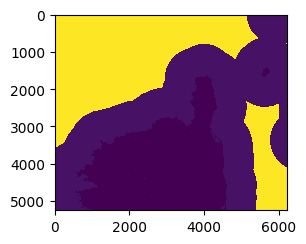

In [36]:
driver = gdal.GetDriverByName('GTiff')
raster = gdal.Open('test-data/testdata-seasonality.tif')
# ReadAsArray loads the first band into a numpy array
raster_data = ras.GetRasterBand(1).ReadAsArray()

fig, ax = plt.subplots(1, figsize=(3,6))
ax.imshow(raster_data, interpolation='none')

## Extracting the nodata value (open water, sea) with np.where

In [37]:
raster_nodata = np.where(raster_data == 255, 1, 0)

## Buliding the dilation mask to fill gaps

In [39]:
di_mask = ndimage.binary_dilation(raster_nodata, iterations = 50)

Text(0.5, 1.0, 'After Dilation')

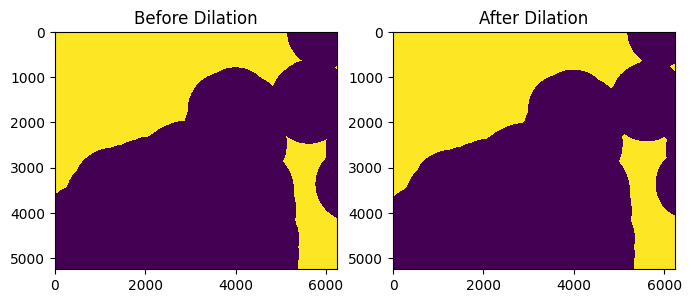

In [41]:
fig, (before, after) = plt.subplots(1,2, figsize=(8,14))
before.imshow(raster_nodata, interpolation='none')
before.set_title("Before Dilation")
after.imshow(di_mask, interpolation='none')
after.set_title("After Dilation")

## Masking the original data based on the dilation mask

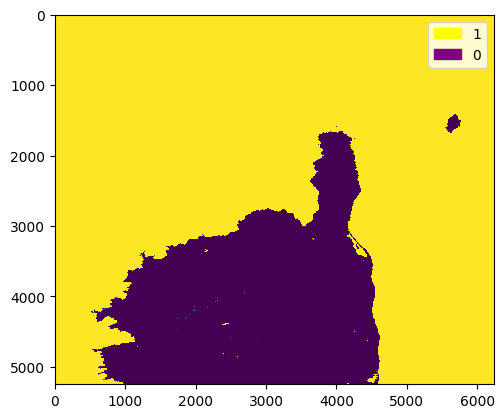

In [13]:
ip_raster = np.where(di_mask, 12, original_raster)
plt.imshow(ip_raster, interpolation='none')
water = mpatches.Patch(color='yellow', label='1')
nowater = mpatches.Patch(color='purple', label='0')
plt.legend(handles=[water, nowater])
plt.show()

## Building the final Watermask based on the seasonality value of every pixel.
seasonality (pixel) value = the number of months water was present.

In [45]:
watermask = np.where((ip_raster > 3), 1, 0) # more then 3 month of water

## Saving the data to a new tif file

In [46]:
nd_raster = driver.Create("test-data/watermask_3.tif", ras.RasterXSize , ras.RasterYSize , 1)
nd_raster.SetGeoTransform(ras.GetGeoTransform())##sets same geotransform as input
nd_raster.SetProjection(ras.GetProjection())##sets same projection as input
nd_raster.GetRasterBand(1).WriteArray(watermask)
nd_raster.FlushCache() ##saves to disk!!
nd_raster = None

## Optional Sieve to remove small raster polygons

In [47]:
from osgeo_utils.gdal_sieve import gdal_sieve

gdal_sieve(
    src_filename="test-data/watermask_3.tif",
    dst_filename="test-data/watermask_3_sieve.tif",
    threshold=100,
    connectedness=8
)

0...10...20...30...40...50...60...70...80...90...100 - done.


0